# MNIST with Multi-layer Perceptron using Tensorflow

In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.images.shape

(55000, 784)

So, it has 55,000 images each with 784 features. 

In [7]:
sample = mnist.train.images[3].reshape(28,28)

In [8]:
sample

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

Every image is of 28 x 28 pixels and hence there are 784 features.

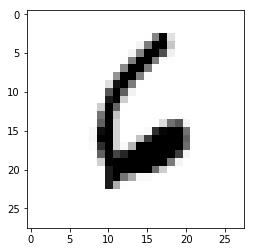

In [9]:
plt.imshow(sample, cmap='Greys')

## Defining Parameters

* Learning Rate - How quickly to adjust the cost function.
* Training Epochs - How many training cycles to go through
* Batch Size - Size of the 'batches' of training data

In [10]:
# Parameters
learning_rate = 0.001
training_epochs = 25
batch_size = 100

In [11]:
# Network Parameters
n_hidden_1 = 256 # 1st layer number of features
n_hidden_2 = 256 # 2nd layer number of features
n_input = 784 # MNIST data input (img shape: 28*28)
n_classes = 10 # MNIST total classes (0-9 digits)
n_samples = mnist.train.num_examples

###  TensorFlow Graph Input

In [12]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

## Multilayer function

In [13]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
    # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Z = W*X + B
    layer_1 = tf.nn.relu(layer_1)
    # RELU -> f(Z) = max(0,Z)
    
    # Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

## Weights and Bias

In [14]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}
weights

{'h1': <tf.Variable 'Variable:0' shape=(784, 256) dtype=float32_ref>,
 'h2': <tf.Variable 'Variable_1:0' shape=(256, 256) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_2:0' shape=(256, 10) dtype=float32_ref>}

In [15]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}
biases

{'b1': <tf.Variable 'Variable_3:0' shape=(256,) dtype=float32_ref>,
 'b2': <tf.Variable 'Variable_4:0' shape=(256,) dtype=float32_ref>,
 'out': <tf.Variable 'Variable_5:0' shape=(10,) dtype=float32_ref>}

In [16]:
pred = multilayer_perceptron(x, weights, biases)

## Cost and Optimization Functions

We'll use Tensorflow's built-in functions for this part (check out the documentation for a lot more options and discussion on this):

In [17]:
# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Training the Model

### next_batch()

Before we get started I want to cover one more convenience function in our mnist data object called next_batch. This returns a tuple in the form (X,y) with an array of the data and a y array indicating the class in the form of a binary array. For example:

In [18]:
Xsamp,ysamp = mnist.train.next_batch(1)

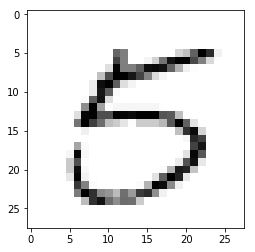

In [19]:
plt.imshow(Xsamp.reshape(28,28),cmap="Greys")

In [20]:
# Remember indexing starts at zero!
print(ysamp)

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]]


# Run the Session

In [21]:
sess = tf.InteractiveSession()

In [22]:
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [23]:
sess.run(init)

In [24]:
# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Start with cost = 0.0
    avg_cost = 0.0

    # Convert total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Grab the next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but we only need 'c' the cost
        # So we set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Compute average loss
        avg_cost += c / total_batch

    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=157.7738
Epoch: 2 cost=41.8657
Epoch: 3 cost=26.1782
Epoch: 4 cost=18.2599
Epoch: 5 cost=13.1969
Epoch: 6 cost=9.6125
Epoch: 7 cost=7.1099
Epoch: 8 cost=5.4710
Epoch: 9 cost=4.0818
Epoch: 10 cost=3.0963
Epoch: 11 cost=2.4285
Epoch: 12 cost=1.7049
Epoch: 13 cost=1.2763
Epoch: 14 cost=1.0690
Epoch: 15 cost=0.9400
Epoch: 16 cost=0.7065
Epoch: 17 cost=0.5039
Epoch: 18 cost=0.5037
Epoch: 19 cost=0.4500
Epoch: 20 cost=0.4468
Epoch: 21 cost=0.4419
Epoch: 22 cost=0.4105
Epoch: 23 cost=0.3550
Epoch: 24 cost=0.3717
Epoch: 25 cost=0.3210
Model has completed 25 Epochs of Training


## MOdel Evaluation

In [25]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [26]:
print(correct_predictions[0])

Tensor("strided_slice:0", shape=(), dtype=bool)


In order to get a numerical value for our predictions we will need to use tf.cast to cast the Tensor of booleans back into a Tensor of Floating point values in order to take the mean of it.

In [27]:
correct_predictions = tf.cast(correct_predictions, "float")

In [28]:
print(correct_predictions[0])

Tensor("strided_slice_1:0", shape=(), dtype=float32)


Now we use the tf.reduce_mean function in order to grab the mean of the elements across the tensor.

In [29]:
accuracy = tf.reduce_mean(correct_predictions)

In [30]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

In [31]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [32]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [33]:
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9577
